# First little exploration of the movie dataset

In [2]:
import pandas as pd

In [3]:
movie_metadata = pd.read_csv('imdb_to_wikipedia.csv')

In [14]:
movie_metadata['item'] = movie_metadata['item'].apply(lambda x : x.rsplit('/', 1)[-1])

In [25]:
movie_metadata.head()
movie_metadata.drop(columns = ['sitelink'], inplace = True)
movie_metadata['item'] = movie_metadata['item'].apply(lambda x : x.rsplit('Q', 1)[-1])
movie_metadata

,item,IMDb_ID
0,24515,tt1533749
1,24585,tt0024480
2,24618,tt0116675
3,24732,tt0005005
4,24815,tt0033467
...,...,...
216068,114877272,tt6231588
216069,114878014,tt7544218
216070,114885544,tt15100778
216071,114887327,tt0332064


### IMDB data

In [1]:
import gzip
import pandas as pd
f=gzip.open('./title.principals.tsv.gz','rb')

imdb_data1 = pd.read_csv(f, sep='\t')



FileNotFoundError: [Errno 2] No such file or directory: './title.principals.tsv.gz'

In [ ]:
imdb_data1.head(10)

In [ ]:
len(imdb_data1)

In [ ]:
f=gzip.open('./name.basics.tsv.gz','rb')

imdb_data2 = pd.read_csv(f, sep='\t')

In [ ]:
imdb_data2.head(20)

## Movie.metadata

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import json
from wordcloud import WordCloud, STOPWORDS

data_folder = './data/MovieSummaries/'

movie_metadata = pd.read_csv(data_folder + 'movie.metadata.tsv', sep ="\t", header=None
                      , names = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name'
                       ,'Movie release date','Movie box office revenue','Movie runtime',
                       'Movie languages', 'Movie countries','Movie genres'], index_col = 'Wikipedia movie ID')

In [6]:
movie_metadata.head(2)

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
Wikipedia movie ID,,,,,,,,
975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."


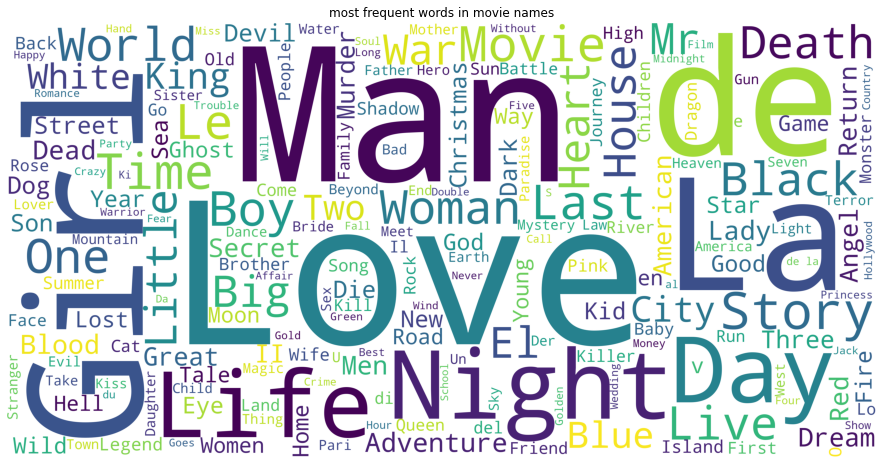

In [7]:
wordcloud_df = movie_metadata.copy()
wordcloud_df['Movie name'] = wordcloud_df['Movie name'].astype('str')
title_corpus = ' '.join(wordcloud_df['Movie name'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('most frequent words in movie names')
plt.show()

In [8]:
movie_metadata.index.is_unique

True

Let's see the movies with biggest box office revenues.

In [9]:
movie_metadata.sort_values('Movie box office revenue', ascending = False).head(2)

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
Wikipedia movie ID,,,,,,,,
4273140,/m/0bth54,Avatar,2009-12-10,2.782275e+09,178.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
52371,/m/0dr_4,Titanic,1997-11-01,2.185372e+09,194.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/09c7w0"": ""United States of America""}","{""/m/0fx2s"": ""Tragedy"", ""/m/04xvh5"": ""Costume ..."


In [10]:
movie_metadata['Movie release date'][:3]

Wikipedia movie ID
975900      2001-08-24
3196793     2000-02-16
28463795          1988
Name: Movie release date, dtype: object

Text(0.5, 1.0, '#films released')

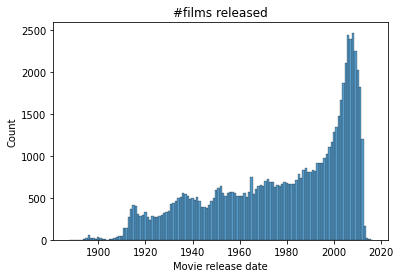

In [11]:
movie_metadata["Movie release date"] = pd.to_datetime(movie_metadata["Movie release date"],errors = 'coerce', utc = True).dt.year
sns.histplot(movie_metadata['Movie release date'], discrete = True)
plt.title('#films released')

Need to process by genres.

Some of the movies have precise dates, others only years.

In [13]:
movie_metadata['Movie languages'] = movie_metadata['Movie languages'].apply(lambda x: json.loads(x)) # Converts to dictionnary
movie_metadata['Movie languages'] = movie_metadata['Movie languages'].apply(lambda x: list(x.values()))
movie_metadata['Movie countries'] = movie_metadata['Movie countries'].apply(lambda x: json.loads(x)) # Converts to dictionnary
movie_metadata['Movie countries'] = movie_metadata['Movie countries'].apply(lambda x: list(x.values()))
movie_metadata['Movie genres'] = movie_metadata['Movie genres'].apply(lambda x: json.loads(x)) # Converts to dictionnary
movie_metadata['Movie genres'] = movie_metadata['Movie genres'].apply(lambda x: list(x.values()))

Text(0.5, 1.0, 'Top languages')

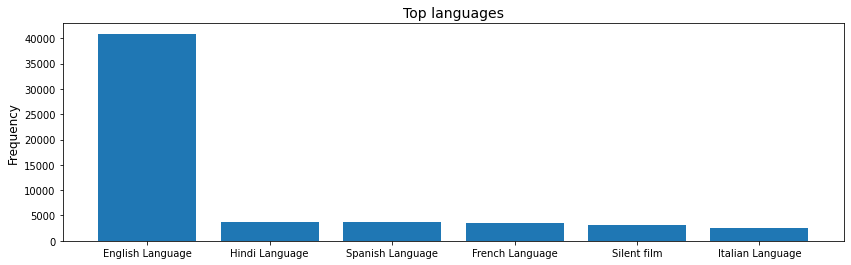

In [14]:
# helpful source : https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173

languages_dict = {}
for i in movie_metadata['Movie languages']:
    for j in i:
        if j not in languages_dict:
            languages_dict[j] = 1
        else:
            languages_dict[j] += 1
            
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

a = to_1D(movie_metadata['Movie languages']).value_counts().nlargest(6)

fig, ax = plt.subplots(figsize = (14,4))
ax.bar(a.index,
        a.values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top languages", size = 14)

Text(0.5, 0, '')

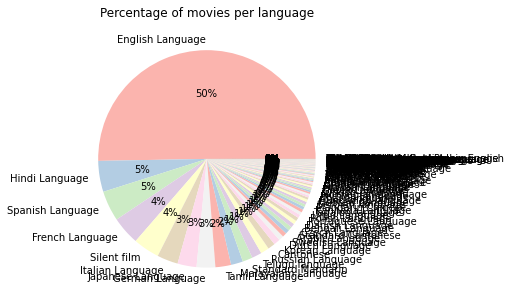

In [32]:
# Distribution of the 10 genres (pie chart in cute colors)
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

to_1D(movie_metadata['Movie languages']).value_counts().plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(5, 5), colors=colors)
plt.title('Percentage of movies per language')
plt.ylabel('')
plt.xlabel('')

Text(0.5, 1.0, 'Top movie coutries')

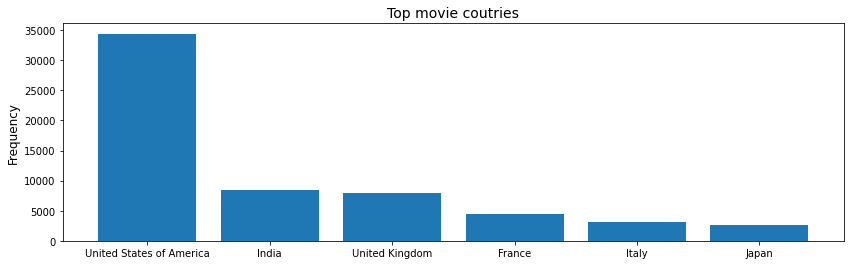

In [98]:
languages_dict = {}
for i in movie_metadata['Movie countries']:
    for j in i:
        if j not in languages_dict:
            languages_dict[j] = 1
        else:
            languages_dict[j] += 1
            
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

a = to_1D(movie_metadata['Movie countries']).value_counts().nlargest(6)

fig, ax = plt.subplots(figsize = (14,4))
ax.bar(a.index,
        a.values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top movie coutries", size = 14)

Text(0.5, 1.0, 'Top genres')

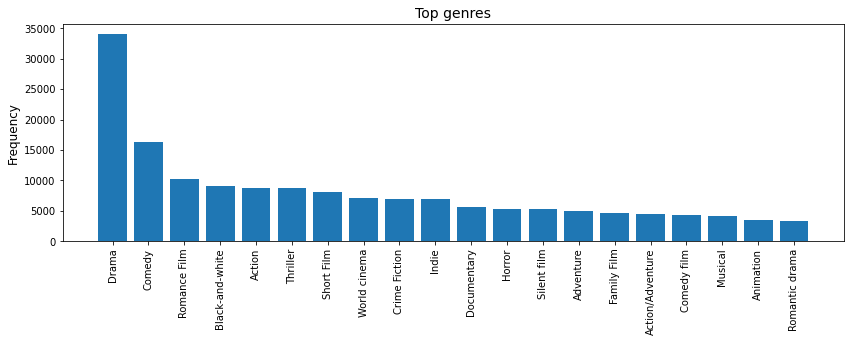

In [99]:
languages_dict = {}
for i in movie_metadata['Movie genres']:
    for j in i:
        if j not in languages_dict:
            languages_dict[j] = 1
        else:
            languages_dict[j] += 1
            
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

a = to_1D(movie_metadata['Movie genres']).value_counts().nlargest(20)

fig, ax = plt.subplots(figsize = (14,4))
ax.bar(a.index,
        a.values)
plt.xticks(rotation=90)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top genres", size = 14)

## Character.metadata

In [34]:
char_metadata = pd.read_csv(data_folder + 'character.metadata.tsv', sep ="\t", header=None
                      , names = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date'
                       ,'Character name','Actor date of birth','Actor gender',
                       'Actor height', 'Actor ethnicity','Actor name','Actor age at movie release',
                        'Freebase character/actor map ID', 'Freebase character ID',
                        'Freebase actor ID'], index_col = 'Wikipedia movie ID')

In [35]:
char_metadata.head()

,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
Wikipedia movie ID,,,,,,,,,,,,
975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


Few tests to see how bad the data is.

In [36]:
len(char_metadata[char_metadata['Actor age at movie release']<0])

381

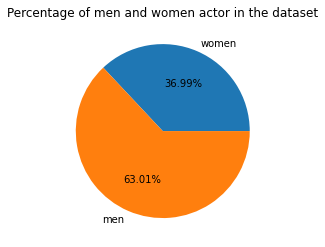

In [37]:
df_fem = char_metadata[char_metadata['Actor gender'] == 'F']
df_masc = char_metadata[char_metadata['Actor gender'] == 'M']
mylabels = ["women", "men"]
plt.pie(np.array([df_fem['Actor name'].nunique(),df_masc['Actor name'].nunique()]), labels = mylabels, autopct='%1.2f%%')
plt.title("Percentage of men and women actor in the dataset")
plt.show()

In [38]:
char_metadata["Actor date of birth"] = pd.to_datetime(char_metadata["Actor date of birth"],errors = 'coerce', utc = True)
char_metadata["Movie release date"] = pd.to_datetime(char_metadata["Movie release date"],errors = 'coerce', utc = True)

In [39]:
print(char_metadata["Actor date of birth"].dt.year)

Wikipedia movie ID
975900      1958.0
975900      1974.0
975900      1969.0
975900      1967.0
975900      1977.0
             ...  
913762      1970.0
913762      1965.0
28308153    1941.0
28308153       NaN
28308153       NaN
Name: Actor date of birth, Length: 450669, dtype: float64


In [40]:
char_metadata['year_distrib'] = char_metadata["Actor date of birth"].dt.year
char_meta2 = char_metadata.copy()
char_meta2['Movie release date'] = char_meta2['Movie release date'].dt.year

Text(0.5, 1.0, '#films released')

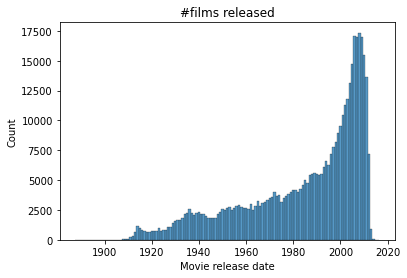

In [41]:
char_metadata.drop_duplicates(subset = 'Actor name')
char_meta2.drop_duplicates(subset = 'Freebase movie ID' )
sns.histplot(char_meta2['Movie release date'], discrete = True)
plt.title('#films released')

Text(0.5, 1.0, 'Date of birth of actors')

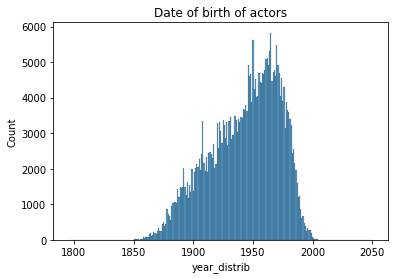

In [42]:
sns.histplot(char_metadata['year_distrib'], discrete = True)
plt.title('Date of birth of actors')

Text(0.5, 1.0, 'Top characters')

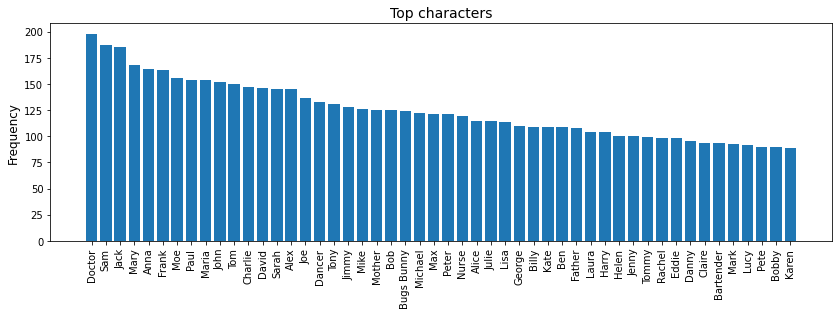

In [43]:
b = char_metadata['Character name'].value_counts().nlargest(50)
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(b.index,
        b.values)
plt.xticks(rotation=90)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top characters", size = 14)

Text(0.5, 1.0, 'Top actors')

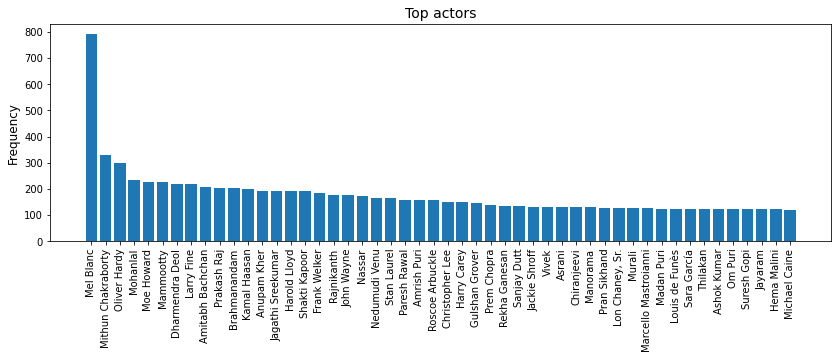

In [44]:
c = char_metadata['Actor name'].value_counts().nlargest(50)
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(c.index,
        c.values)
plt.xticks(rotation=90)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top actors", size = 14)

In [51]:
ethnic_df = pd.read_csv('./Freebase_ids/' + 'ethnic_group_query.csv')
ethnic_df.head(5)
ethnic_df.rename(columns = {'freebaseID':'Actor ethnicity'}, inplace = True)
merged_df = char_metadata.merge(ethnic_df, how = 'left', on = 'Actor ethnicity')


In [52]:
merged_df

,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,year_distrib,name
0,/m/03vyhn,2001-08-24 00:00:00+00:00,Akooshay,1958-08-26 00:00:00+00:00,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,1958.0,NaN
1,/m/03vyhn,2001-08-24 00:00:00+00:00,Lieutenant Melanie Ballard,1974-08-15 00:00:00+00:00,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,1974.0,NaN
2,/m/03vyhn,2001-08-24 00:00:00+00:00,Desolation Williams,1969-06-15 00:00:00+00:00,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,1969.0,NaN
3,/m/03vyhn,2001-08-24 00:00:00+00:00,Sgt Jericho Butler,1967-09-12 00:00:00+00:00,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,1967.0,NaN
4,/m/03vyhn,2001-08-24 00:00:00+00:00,Bashira Kincaid,1977-09-25 00:00:00+00:00,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,1977.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,/m/03pcrp,1992-05-21 00:00:00+00:00,Elensh,1970-05-01 00:00:00+00:00,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv,1970.0,NaN
450665,/m/03pcrp,1992-05-21 00:00:00+00:00,Hibiki,1965-04-12 00:00:00+00:00,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j,1965.0,NaN
450666,/m/0cp05t9,1957-01-01 00:00:00+00:00,NaN,1941-11-18 00:00:00+00:00,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44,1941.0,English people
450667,/m/0cp05t9,1957-01-01 00:00:00+00:00,NaN,NaT,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm,NaN,NaN


Text(0.5, 1.0, 'Top ethnicity')

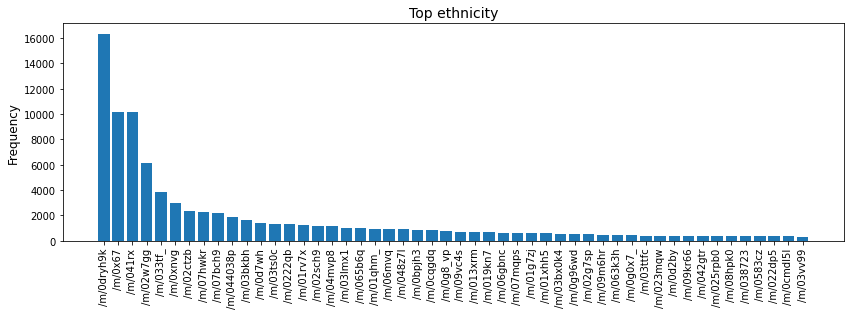

In [55]:
d = char_metadata['Actor ethnicity'].value_counts().nlargest(50)
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(d.index,
        d.values)
plt.xticks(rotation=90)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top ethnicity", size = 14)

Text(0.5, 1.0, 'Top ethnicity')

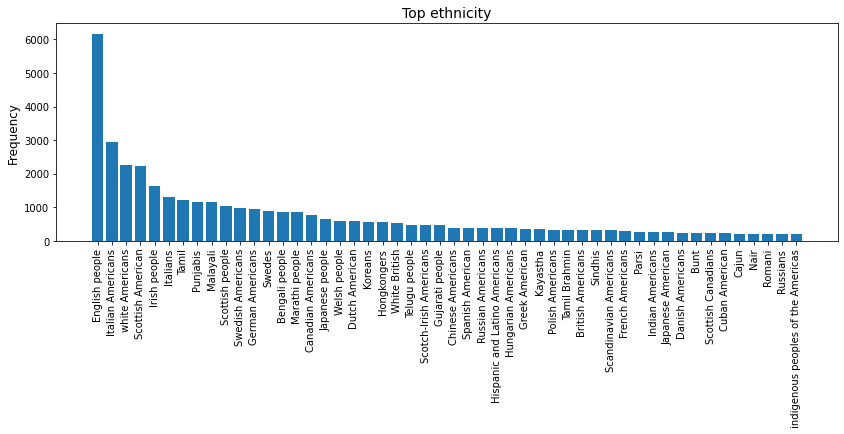

In [54]:
d = merged_df['name'].value_counts().nlargest(50)
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(d.index,
        d.values)
plt.xticks(rotation=90)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top ethnicity", size = 14)

Not very useful, let's fetch freebase ids

https://www.youtube.com/watch?v=-pFTxOoiuYI



In [60]:
import requests

query = "https://query.wikidata.org/#PREFIX%20wd%3A%20%3Chttp%3A%2F%2Fwww.wikidata.org%2Fentity%2F%3E%0APREFIX%20wdt%3A%20%3Chttp%3A%2F%2Fwww.wikidata.org%2Fprop%2Fdirect%2F%3E%0APREFIX%20wikibase%3A%20%3Chttp%3A%2F%2Fwikiba.se%2Fontology%23%3E%0A%0ASELECT%20%20%3Fs%20%3FsLabel%20%3Fp%20%20%3Fo%20%3FoLabel%20WHERE%20%7B%0A%20%3Fs%20wdt%3AP646%20%22%2Fm%2F03vyhn%22%0A%20%20%20SERVICE%20wikibase%3Alabel%20%7B%0A%20%20%20%20bd%3AserviceParam%20wikibase%3Alanguage%20%22en%22%20.%0A%20%20%20%7D%0A%20%7D"

response = requests.get(query)
print(response.json())


JSONDecodeError: [Errno Expecting value] <!DOCTYPE html><html lang="en" dir="ltr"><head><meta charset="utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta name="viewport" content="width=device-width,initial-scale=1,user-scalable=yes"><link rel="stylesheet" href="css/style.min.372a7e7a49dcaedce6ae.css"><link id="favicon" rel="shortcut icon"><script src="js/shim.min.05fe49cdd30866fd4947.js"></script><style id="MJX-CHTML-styles">/* placeholder for MathJax */</style></head><body><div class="wikibase-queryservice container-fluid"><div class="row"><nav class="navbar navbar-default"><div class="navbar-header"><button type="button" class="navbar-toggle collapsed" data-toggle="collapse" data-target="#header-navbar-collapse" aria-expanded="false"><span class="sr-only">Toggle navigation</span><span class="icon-bar"></span><span class="icon-bar"></span><span class="icon-bar"></span></button><div class="navbar-brand"><a href="./"><img src="data:image/gif;base64,R0lGODlhAQABAAAAACwAAAAAAQABAAA="><span></span></a></div></div><div class="collapse navbar-collapse in" id="header-navbar-collapse"><ul class="nav navbar-nav navbar-left" id="left-navbar"><li><button type="button" class="btn navbar-btn btn-default" id="open-example" data-toggle="modal" data-target="#QueryExamples"><span class="fa fa-folder-open-o"></span> <span data-i18n="wdqs-app-button-examples" id="examples-label"></span></button></li><li class="dropdown"><div class="btn-group navbar-btn" id="query-builder-dd"><a target="_blank" href="https://query.wikidata.org/querybuilder/" class="btn btn-default dropdown-toggle query-builder-toggle" id="query-builder-toggle"><span data-i18n="wdqs-app-query-builder-name" id="query-builder-label"></span></a><div class="dropdown-menu query-builder"><strong><p data-i18n="wdqs-app-query-builder-dd-title"></p></strong><p data-i18n="wdqs-app-query-builder-dd-copy"></p><a class="query-builder-toggle" target="_blank" href="https://query.wikidata.org/querybuilder/"><img src="./wikibase/queryService/ui/304px_querybuilder_final.gif"></a></div></div></li><li class="dropdown"><div class="btn-group navbar-btn"><a href="https://www.wikidata.org/wiki/Special:MyLanguage/Wikidata:SPARQL_query_service/Wikidata_Query_Help" target="_blank" class="btn btn-default"><span class="glyphicon glyphicon-question-sign" aria-hidden="true"></span> <span data-i18n="wdqs-app-button-help" id="help-label"></span> </a><button data-toggle="dropdown" class="btn btn-default dropdown-toggle" id="help-toggle"><span class="caret"></span></button><ul class="dropdown-menu"><li><a target="_blank" rel="noopener" href="https://www.wikidata.org/wiki/Special:MyLanguage/Wikidata:SPARQL_query_service/Wikidata_Query_Help" data-i18n="wdqs-app-help-portal"></a></li><li><a target="_blank" rel="noopener" href="https://www.mediawiki.org/wiki/Special:MyLanguage/Wikidata_Query_Service/User_Manual" data-i18n="wdqs-app-help-manual"></a></li><li><a target="_blank" rel="noopener" id="examples-link" href="https://www.wikidata.org/wiki/Special:MyLanguage/Wikidata:SPARQL_query_service/queries/examples" data-i18n="wdqs-app-help-examples"></a></li><li role="separator" class="divider"></li><li><a target="_blank" rel="noopener" href="https://www.w3.org/TR/sparql11-query/">SPARQL</a></li><li><a target="_blank" rel="noopener" href="https://www.mediawiki.org/wiki/Special:MyLanguage/Wikibase/Indexing/RDF_Dump_Format" data-i18n="wdqs-app-help-datamodel"></a></li><li><a target="_blank" rel="noopener" href="https://www.mediawiki.org/wiki/Special:MyLanguage/Wikibase/Indexing/RDF_Dump_Format#Full_list_of_prefixes" data-i18n="wdqs-app-help-prefixes"></a></li><li role="separator" class="divider"></li><li><a target="_blank" rel="noopener" href="https://www.wikidata.org/wiki/Special:MyLanguage/Wikidata:Request_a_query" data-i18n="wdqs-app-help-request-query"></a></li><li><a target="_blank" rel="noopener" href="https://www.mediawiki.org/w/index.php?title=Talk:Wikidata_Query_Service&action=edit&section=new" data-i18n="wdqs-app-help-feedback"></a></li><li><a target="_blank" rel="noopener" id="copyright-link" href="https://www.wikidata.org/wiki/Special:MyLanguage/Wikidata:SPARQL_query_service/Copyright" data-i18n="wdqs-app-help-copy"></a></li></ul></div></li><li class="dropdown"><div class="btn-group navbar-btn"><a href="https://www.wikidata.org/wiki/Special:MyLanguage/Wikidata:Tools" target="_blank" class="btn btn-default"><span class="glyphicon glyphicon-cog" aria-hidden="true"></span> <span data-i18n="wdqs-app-button-more-tools" id="tools-label"></span> </a><button data-toggle="dropdown" class="btn btn-default dropdown-toggle" id="tools-toggle"><span class="caret"></span></button><ul class="dropdown-menu"><li><a target="_blank" rel="noopener" href="https://www.wikidata.org/wiki/Special:MyLanguage/Wikidata:Tools/Edit_items" data-i18n="wdqs-app-tools-edit-items"></a></li><li><a target="_blank" rel="noopener" href="https://www.wikidata.org/wiki/Special:MyLanguage/Wikidata:Tools/Query_data" data-i18n="wdqs-app-tools-query-data"></a></li><li><a target="_blank" rel="noopener" href="https://www.wikidata.org/wiki/Special:MyLanguage/Wikidata:Tools/Enhance_user_interface" data-i18n="wdqs-app-tools-enhance-ui"></a></li><li><a target="_blank" rel="noopener" href="https://www.wikidata.org/wiki/Special:MyLanguage/Wikidata:Tools/Visualize_data" data-i18n="wdqs-app-tools-visualize-data"></a></li><li><a target="_blank" rel="noopener" href="https://www.wikidata.org/wiki/Special:MyLanguage/Wikidata:List_of_properties" data-i18n="wdqs-app-tools-list-properties"></a></li><li><a target="_blank" rel="noopener" href="https://www.wikidata.org/wiki/Special:MyLanguage/Wikidata:Tools/Lexicographical_data" data-i18n="wdqs-app-tools-lexicographical-data"></a></li><li><a target="_blank" rel="noopener" href="https://www.wikidata.org/wiki/Special:MyLanguage/Wikidata:Tools/For_programmers" data-i18n="wdqs-app-tools-for-programmers"></a></li><li role="separator" class="divider"></li><li><a target="_blank" rel="noopener" href="https://tools.wmflabs.org/hay/directory/#/search/wikidata">Wikimedia Toolforge</a></li></ul></div></li></ul><ul class="nav navbar-nav navbar-right" id="right-navbar"><li><a href="#" class="uls-trigger" id="language-toggle" data-toggle="tooltip"></a></li></ul></div></nav><div id="query-box"><form id="query-form" action="https://query.wikidata.org/bigdata/namespace/wdq/sparql"><div class="query-main"><div class="toolbar"><div class="toolbar-top"><div><a href="#" class="btn query-helper-trigger" data-toggle="tooltip" data-placement="top" data-i18n="[title]wdqs-app-button-query-helper"><span class="fa fa-info-circle" aria-hidden="true"></span></a></div><div><a href="#" class="btn fullscreen-toggle" data-toggle="tooltip" data-placement="top" data-i18n="[title]wdqs-app-button-fullscreen-title"><span class="fa fa-arrows-alt" aria-hidden="true"></span></a></div><div class="dropdown"><a href="#" class="btn dropdown-toggle" data-toggle="dropdown" role="button" aria-haspopup="true" aria-expanded="false" data-i18n="[title]wdqs-app-button-prefixes"><span class="fa fa-thumb-tack" aria-hidden="true"></span><span class="caret"></span></a><ul class="dropdown-menu"><li><strong data-i18n="wdqs-app-button-prefixes"></strong></li><li role="separator" class="divider"></li><li><div class="namespace-shortcuts"></div></li><li role="separator" class="divider"></li><li><a class="addPrefixes" data-i18n="wdqs-app-editor-addprefixes"></a></li></ul></div><div><a href="#" class="btn" id="format-button" data-toggle="tooltip" data-placement="top" data-i18n="[title]wdqs-app-button-format-title"><span class="fa fa-diamond" aria-hidden="true"></span></a></div><div><a href="#" class="btn" data-i18n="[title]wdqs-app-button-examples" data-toggle="modal" data-target="#QueryExamples"><span class="fa fa-folder-open-o" aria-hidden="true"></span></a></div><div><a href="#" class="btn restore" id="restore-button" data-toggle="tooltip" data-placement="top" data-i18n="[title]wdqs-app-button-restore-title"><span class="fa fa-history" aria-hidden="true"></span></a></div><div><a href="#" class="btn" id="clear-button" data-toggle="tooltip" data-placement="top" data-i18n="[title]wdqs-app-button-clear-title"><span class="fa fa-trash-o" aria-hidden="true"></span></a></div><div><a href="#" class="btn shareQuery shortUrlTrigger query" target="_blank" data-i18n="[title]wdqs-app-shorturl-page-title" data-toggle="popover"><span class="fa fa-link" aria-hidden="true"></span></a></div></div><div class="toolbar-bottom"><button type="submit" class="btn btn-info" id="execute-button" data-toggle="tooltip" data-placement="top" data-i18n="[title]wdqs-app-button-run-title"><span class="fa fa-play" aria-hidden="true"></span></button></div></div><div class="query-helper-and-editor"><div class="query-helper query-helper-hidden"><div class="panel panel-info"><div class="panel-heading"><strong data-i18n="wdqs-app-help-queryhelper"></strong> <a target="_blank" rel="noopener" id="query-helper-help" href="https://www.wikidata.org/wiki/Special:MyLanguage/Wikidata:SPARQL_query_service/Query_Helper"><span class="glyphicon glyphicon-question-sign"></span></a> <button type="button" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></button></div><div class="panel-body"></div></div></div><div class="splitter"></div><div class="query-editor-container" dir="ltr"><textarea class="queryEditor" name="query" data-i18n="[placeholder]wdqs-app-editor-placeholder" placeholder="(Input a SPARQL query or choose a query example)"></textarea></div></div></div><div class="navbar navbar-default query-helper-tag-cloud query-helper-hidden"></div><div class="status navbar navbar-default toolbar"><div class="navbar-right"><span class="dataUpdated"></span></div></div></form></div></div><noscript><div class="row action-bar" style="display: block"><div class="message"><div class="label label-warning">For interactive query editing, a localized user interface, and other improvements, please enable JavaScript or use a browser that supports it.</div></div></div></noscript><div class="row"><nav class="navbar navbar-default result"><ul class="nav navbar-nav navbar-left"><li><a id="display-button" href="#" data-toggle="dropdown" class="dropdown-toggle" data-placement="top" data-i18n="[title]wdqs-app-button-display-title"><span id="display-button-icon" class="glyphicon glyphicon-eye-open" aria-hidden="true"></span><span id="display-button-label"></span><span class="caret"></span></a><ul id="result-browser-menu" class="dropdown-menu" role="menu"></ul></li><li></li><li><a target="_blank" class="help" rel="noopener" href="https://www.wikidata.org/wiki/Special:MyLanguage/Wikidata:SPARQL_query_service/Wikidata_Query_Help/Result_Views"><span class="fa fa-question-circle"></span></a></li></ul><ul class="nav navbar-nav navbar-right"><li class="navbar-text"><span class="query-total"><span class="label label-default" id="response-summary"></span> </span>&nbsp;</li><li><a class="btn" data-toggle="modal" data-target="#CodeExamples" data-i18n="[title]wdqs-app-button-code-title"><span class="fa fa-code"></span> <span data-i18n="wdqs-app-button-code"></span></a></li><li><a id="download-button" href="#" data-toggle="dropdown" class="dropdown-toggle" data-placement="top" data-i18n="[title]wdqs-app-button-download-title"><span class="glyphicon glyphicon-download-alt" aria-hidden="true"></span><span data-i18n="wdqs-app-button-download"></span><span class="caret"></span></a><ul class="dropdown-menu" role="menu"><li><a id="downloadJSON" href="#"><span class="fa fa-file-code-o" aria-hidden="true"></span> <span data-i18n="wdqs-app-result-json"></span></a></li><li><a id="downloadFull-JSON" href="#"><span class="fa fa-file-code-o" aria-hidden="true"></span> <span data-i18n="wdqs-app-result-json-verbose"></span></a></li><li role="separator" class="divider"></li><li><a id="downloadSimple-TSV" href="#"><span class="fa fa-file-excel-o" aria-hidden="true"></span> <span data-i18n="wdqs-app-result-tsv"></span></a></li><li><a id="downloadTSV" href="#"><span class="fa fa-file-excel-o" aria-hidden="true"></span> <span data-i18n="wdqs-app-result-tsv-verbose"></span></a></li><li role="separator" class="divider"></li><li><a id="downloadCSV" href="#"><span class="fa fa-file-excel-o" aria-hidden="true"></span> <span data-i18n="wdqs-app-result-csv"></span></a></li><li role="separator" class="divider"></li><li><a id="downloadHTML" href="#"><span class="fa fa-file-code-o" aria-hidden="true"></span> <span data-i18n="wdqs-app-result-html"></span></a></li><li role="separator" class="divider"></li><li><a id="downloadSVG" href="#"><span class="fa fa-file-image-o" aria-hidden="true"></span> <span data-i18n="wdqs-app-result-svg"></span></a></li></ul></li><li><a id="link-button" href="#" data-toggle="dropdown" class="dropdown-toggle" aria-haspopup="true" aria-expanded="false" data-placement="top" data-i18n="[title]wdqs-app-button-link-title"><span class="glyphicon glyphicon-link" aria-hidden="true"></span><span data-i18n="wdqs-app-button-link"></span><span class="caret"></span></a><ul class="dropdown-menu"><li><a href="#" class="shortUrlTrigger result" target="_blank" data-i18n="[title]wdqs-app-result-shorturl-title" data-toggle="popover"><span data-i18n="wdqs-app-result-shorturl"></span></a></li><li><a target="_blank" class="queryUri" data-i18n="[title]wdqs-app-result-endpoint-title"><span data-i18n="wdqs-app-result-endpoint"></span></a></li><li><a href="#" class="embed result" target="_blank" data-toggle="popover" data-i18n="wdqs-app-result-embed"></a></li></ul></li></ul></nav></div><div class="row action-bar"><div class="message"></div></div><div class="row"><div id="query-result">Test result</div></div><div class="row"><div id="query-error" class="panel-heading"></div></div><div class="row"><div id="empty-query-error" class="text-center"><p data-i18n="wdqs-action-empty-query"></p><button type="button" class="btn navbar-btn btn-default" id="open-example" data-toggle="modal" data-target="#QueryExamples"><span class="fa fa-folder-open-o"></span> <span data-i18n="wdqs-app-button-examples" id="examples-label"></span></button></div></div><div class="row"><div id="loading-spinner"><i class="fa fa-spinner fa-pulse fa-3x fa-fw"></i> <span class="sr-only">Loading...</span></div></div><div id="explorer-dialogs"><div class="explorer-dialog"><div data-role="header" class="modal-header clearfix explorer-header"><h3 data-role="title" class="modal-title pull-left explorer-title">Explorer</h3><button data-role="close" type="button" class="close" data-dismiss="modal" aria-label="Close"><span aria-hidden="true">&times;</span></button></div><div data-role="body" class="explorer-body"></div></div></div></div><div class="modal fade QueryExamples" id="QueryExamples" tabindex="-1" role="dialog" aria-labelledby="QueryExamplesModalLabel"><div class="modal-dialog modal-lg" role="document"><div class="modal-content"><div class="modal-body"><div class="tagCloud"></div><div class="tagFilter"></div><div class="input-group"><span class="input-group-addon"><span class="glyphicon glyphicon-filter" aria-hidden="true"></span></span> <input type="text" class="tableFilter form-control" placeholder="Type to filter"> <span class="input-group-addon"><span class="badge count"></span></span></div><div class="exampleTable"><table class="table"><tbody class="searchable"></tbody></table></div></div></div></div></div><div class="modal" id="keyboardShortcutHelpModal" tabindex="-1" role="dialog" aria-labelledby="keyboardShortcutHelpModalLabel" aria-hidden="true"><div class="modal-dialog" role="document"><div class="modal-content"><div class="modal-header"><h5 class="modal-title" id="keyboardShortcutHelpModalLabel" data-i18n="wdqs-dialog-key-shortcut-title"></h5></div><div class="modal-body"><table class="keyboard-shortcut-help"><tbody><tr><th scope="row"><kbd><kbd>ctrl</kbd>+<kbd>enter</kbd></kbd></th><td data-i18n="wdqs-dialog-key-shortcut-run-query"></td></tr><tr><th scope="row"><kbd>esc</kbd></th><td data-i18n="wdqs-dialog-key-shortcut-esc"></td></tr><tr><th scope="row"><kbd>?</kbd></th><td data-i18n="wdqs-dialog-key-shortcut-show-shortcut-help"></td></tr><tr><th scope="row"><kbd>i</kbd></th><td data-i18n="wdqs-dialog-key-shortcut-focus-textarea"></td></tr><tr><th scope="row"><kbd>r</kbd></th><td data-i18n="wdqs-dialog-key-shortcut-jump-to-result"></td></tr><tr><th scope="row"><kbd>f</kbd></th><td data-i18n="wdqs-dialog-key-shortcut-focus-filter"></td></tr><tr><th scope="row"><kbd>s</kbd></th><td data-i18n="wdqs-dialog-key-shortcut-focus-show"></td></tr><tr><th scope="row"><kbd>m</kbd></th><td data-i18n="wdqs-dialog-key-shortcut-focus-limit"></td></tr><tr><th scope="row"><kbd>e</kbd></th><td data-i18n="wdqs-dialog-key-shortcut-show-example"></td></tr><tr><th scope="row"><kbd>h</kbd></th><td data-i18n="wdqs-dialog-key-shortcut-help-menu"></td></tr><tr><th scope="row"><kbd>l</kbd></th><td data-i18n="wdqs-dialog-key-shortcut-show-language"></td></tr></tbody></table></div><div class="modal-footer"><button type="button" class="btn btn-default" data-dismiss="modal" data-i18n="wdqs-dialog-key-shortcut-close-button"></button></div></div></div></div><div class="modal fade CodeExamples" id="CodeExamples" tabindex="-1" role="dialog" aria-labelledby="CodeExamplesModalLabel"><div class="modal-dialog modal-lg" role="document"><div class="modal-content"><div class="modal-body"><div><ul class="nav nav-tabs" role="tablist"></ul><div class="tab-content"></div></div></div></div></div></div><script src="js/vendor.min.0c96f018ea3fdcadd317.js"></script><script src="js/wdqs.min.7906af714e7933b9c782.js"></script></body></html>: 0

## plot_summaries.txt

Printing the first few lines of the movie summaries

In [56]:
with open(data_folder + "plot_summaries.txt") as myfile:
    head = [next(myfile) for x in range(4)]
print(head)

["23890098\tShlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.\n", '31186339\tThe nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl  between the ages of 12 and 18 selected by lottery  for the annual Hunger Games. The tributes must fight to the death in an arena; the sole survivor is rewarded with fame and wealth. In her first Reaping, 12-year-old Primrose Everdeen is chosen from District 12. Her older sister Katniss volunteers to take her place. Peeta Mellark, a baker\'s son who once gave Katniss bread when she was starving, is the other District 12 tribute. Katniss and Peeta are taken to the Capitol, accompanied by their frequently drunk mentor, past victor Haymitch Abernathy. He warns them about the "Career" tributes who train intensively at special academi

## name.clusters.txt

In [17]:
with open(data_folder + "name.clusters.txt") as myfile:
    head = [next(myfile) for x in range(3)]
print(head)

['Stuart Little\t/m/0k3w9c\n', 'Stuart Little\t/m/0k3wcx\n', 'Stuart Little\t/m/0k3wbn\n']


## tvtropes.cluster.txt

In [18]:
with open(data_folder + "tvtropes.clusters.txt") as myfile:
    head = [next(myfile) for x in range(3)]
print(head)


['absent_minded_professor\t{"char": "Professor Philip Brainard", "movie": "Flubber", "id": "/m/0jy9q0", "actor": "Robin Williams"}\n', 'absent_minded_professor\t{"char": "Professor Keenbean", "movie": "Richie Rich", "id": "/m/02vchl3", "actor": "Michael McShane"}\n', 'absent_minded_professor\t{"char": "Dr. Reinhardt Lane", "movie": "The Shadow", "id": "/m/0k6fkc", "actor": "Ian McKellen"}\n']


## corenlp_plot_summaries.tar.gz (to load)